So from task3_analysis.ipynb we saw that 6th column and target are related. 

As I have said before in task3_analysis.ipynb, I prefer ML solution so you can check it in task3_regression.ipynb but I will provide You also with DL solution 

Let's build a Deep learning model. 

First of all we should do some imports(tensorflow as main tool for DL and matplotlib for visualization)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2023-03-09 23:57:10.725786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's get and preprocess the data we think is the most critical for our model(6th and 'target' columns from intership_train.csv)

In [2]:
import pandas as pd
import numpy as np
features = pd.read_csv('Data/internship_train.csv')['6']
labels = pd.read_csv('Data/internship_train.csv')['target']
features = np.array(features)
labels = np.array(labels)

Let's get and preprocess test data

In [3]:
X_test = pd.read_csv('Data/internship_hidden_test.csv')
X_test = X_test['6']
X_test

0       3.316625
1      -8.888194
2       2.645751
3      -6.164414
4       8.000000
          ...   
9995    6.708204
9996    5.656854
9997    4.690416
9998    4.000000
9999    9.539392
Name: 6, Length: 10000, dtype: float64

Let's split our data to train and validatite datasets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train, y_train

(array([-6.8556546 ,  6.92820323,  7.07106781, ...,  4.69041576,
        -4.58257569,  7.28010989]),
 array([47.72338302, 48.81575763, 50.87937167, ..., 22.95269759,
        21.19962302, 53.60049563]))

Let's define our sequential deep learning model(I don't think that dense count is so critical for this task)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

2023-03-09 23:57:15.724239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


And compile it

Optimizer -> Adam(lr=0.01(defalut))

Loss -> MSE

Metrics -> RMSE

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

Also I think that defining early stopping callback is also worth doing

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Let's set random seed to 42 and fit our model

In [8]:
tf.random.set_seed(42)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
1125/1125 [==============================] - 3s 2ms/step - loss: 211.9288 - root_mean_squared_error: 14.5578 - val_loss: 0.6599 - val_root_mean_squared_error: 0.8123
Epoch 2/50
1125/1125 [==============================] - 2s 2ms/step - loss: 0.2385 - root_mean_squared_error: 0.4884 - val_loss: 0.1211 - val_root_mean_squared_error: 0.3479
Epoch 3/50
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1239 - root_mean_squared_error: 0.3520 - val_loss: 0.1157 - val_root_mean_squared_error: 0.3402
Epoch 4/50
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1271 - root_mean_squared_error: 0.3565 - val_loss: 0.1144 - val_root_mean_squared_error: 0.3383
Epoch 5/50
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1373 - root_mean_squared_error: 0.3705 - val_loss: 0.0903 - val_root_mean_squared_error: 0.3004
Epoch 6/50
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1310 - root_mean_squared_error: 0.3619 - val_loss

So we get loss = 0.1328 and rmse = 0.3644 on training data and loss = 0.1811 and rmse = 0.4256 on validation data(your result may vary)

I think this result is quite good because of datasets biases

Small function definiton to check model history

In [14]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('Epochs')
  plt.legend()

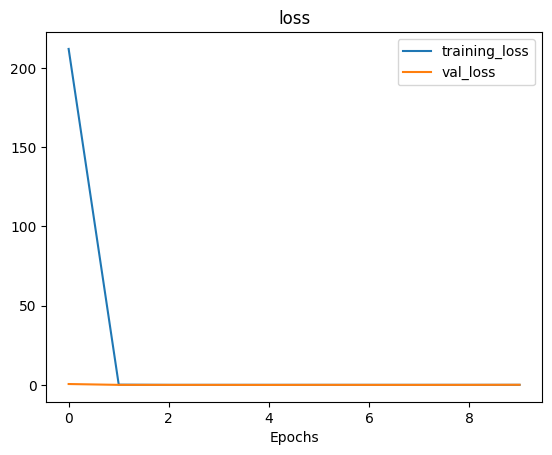

In [15]:
plot_loss_curves(history)

Let's do our predictions and save them to predictions.csv

In [23]:
predictions = model.predict(X_test)
np.savetxt('results/predictions_DL.csv', predictions, delimiter=',')

313/313 [==============================] - 0s 945us/step


Let's define a function that will plot y against x and call it to see the results

In [20]:
def plot_func(x, y):
    """
    Function to plot y=f(x)
    
    """
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Predicted")
    x_squared = np.linspace(np.min(x), np.max(x), 100)
    y_squared = x_squared ** 2
    ax.plot(x_squared, y_squared, color='r', label="y=x^2")
    
    plt.xlabel('Feature Values')
    plt.ylabel('Labels Values')
    plt.title('Plot of Labels vs Features')
    plt.legend()
    plt.show()

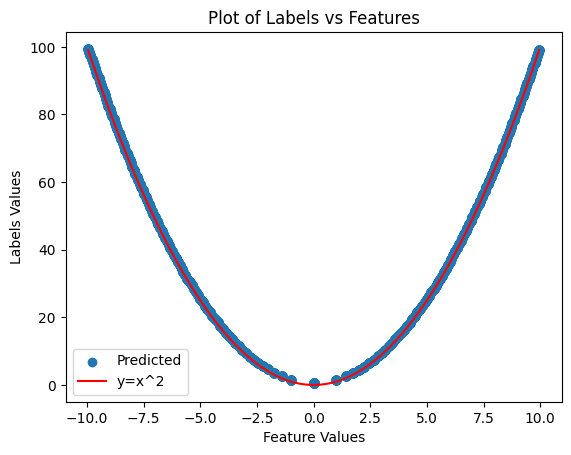

In [21]:
plot_func(X_test, predictions)